# 21BAI1133 - Mukundh J

# ML Lab assignment 10 -K Means Clustering Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##### Q1. Consider the following 2-D datasets flame (flame.csv) and toy (toy.csv). Implement K-means clustering algorithm to segment the above datasets into 2 clusters.  Show the scatterplot for the original clusters as well as the clusters obtained by your implementation. 

In [2]:
flame = pd.read_csv('flame.csv')
toy = pd.read_csv('toy.csv')

In [3]:
flame

,1.85,27.8,1
0,1.35,26.65,1
1,1.40,23.25,2
2,0.85,23.05,2
3,0.50,22.35,2
4,0.65,21.35,2
...,...,...,...
234,7.50,26.20,1
235,7.50,25.65,1
236,7.05,25.85,1
237,6.90,27.15,1


In [4]:
toy

,0.85,17.45,2
0,0.75,15.60,2
1,3.30,15.45,2
2,5.25,14.20,2
3,4.90,15.65,2
4,5.35,15.85,2
...,...,...,...
367,38.75,16.85,1
368,39.00,16.60,1
369,38.25,17.35,1
370,39.50,16.95,1


In [5]:
toy.isnull().sum()

0.85     0
17.45    0
2        0
dtype: int64

In [6]:
flame.isnull().sum()

1.85    0
27.8    0
1       0
dtype: int64

In [7]:
flame.dtypes


1.85    float64
27.8    float64
1         int64
dtype: object

In [8]:
toy.dtypes

0.85     float64
17.45    float64
2          int64
dtype: object

In [9]:
flame.describe()

,1.85,27.8,1
count,239.000000,239.000000,239.000000
mean,7.346653,20.899791,1.640167
std,3.189473,3.360983,0.480958
min,0.500000,14.450000,1.000000
25%,5.275000,18.225000,1.000000
50%,7.300000,20.700000,2.000000
75%,9.325000,23.525000,2.000000
max,14.200000,27.600000,2.000000


In [10]:
toy.describe()

,0.85,17.45,2
count,372.000000,372.000000,372.000000
mean,24.393817,12.131720,1.258065
std,9.790840,6.608521,0.438159
min,0.750000,2.950000,1.000000
25%,17.425000,6.287500,1.000000
50%,23.150000,11.225000,1.000000
75%,33.350000,16.500000,2.000000
max,41.300000,27.850000,2.000000


In [11]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [12]:
def kmeans(X, K, max_iters=100):
    centroids = X[np.random.choice(range(len(X)), K, replace=False)]
    
    clusters = [[] for i in range(K)]
    
    for i in range(max_iters):
        for i, x in enumerate(X):
            distances = [euclidean_distance(x, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(i)
        
        prev_centroids = centroids.copy()
        for i, cluster in enumerate(clusters):
            if len(cluster) > 0:
                centroids[i] = np.mean(X[cluster], axis=0)
        
        if np.allclose(prev_centroids, centroids):
            break
    
    return centroids, clusters


In [13]:
flame_X = flame.iloc[:, :-1].values
toy_X = toy.iloc[:, :-1].values

In [14]:
flame_centroids, flame_clusters = kmeans(flame_X, K=2)
toy_centroids, toy_clusters = kmeans(toy_X, K=2)

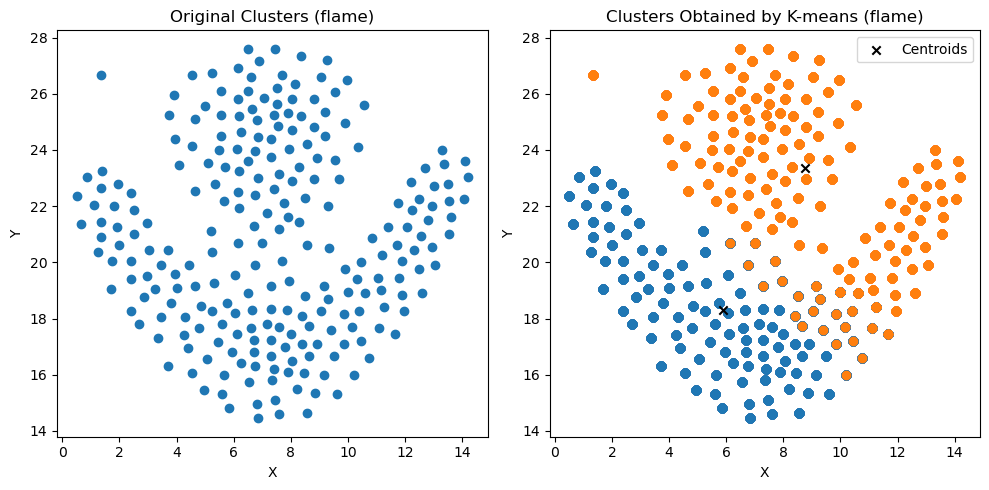

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(flame_X[:, 0], flame_X[:, 1])
plt.title('Original Clusters (flame)')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
for i, cluster in enumerate(flame_clusters):
    plt.scatter(flame_X[cluster, 0], flame_X[cluster, 1])
plt.scatter(flame_centroids[:, 0], flame_centroids[:, 1], color='black',marker="x", label='Centroids')
plt.title('Clusters Obtained by K-means (flame)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.tight_layout()
plt.show()

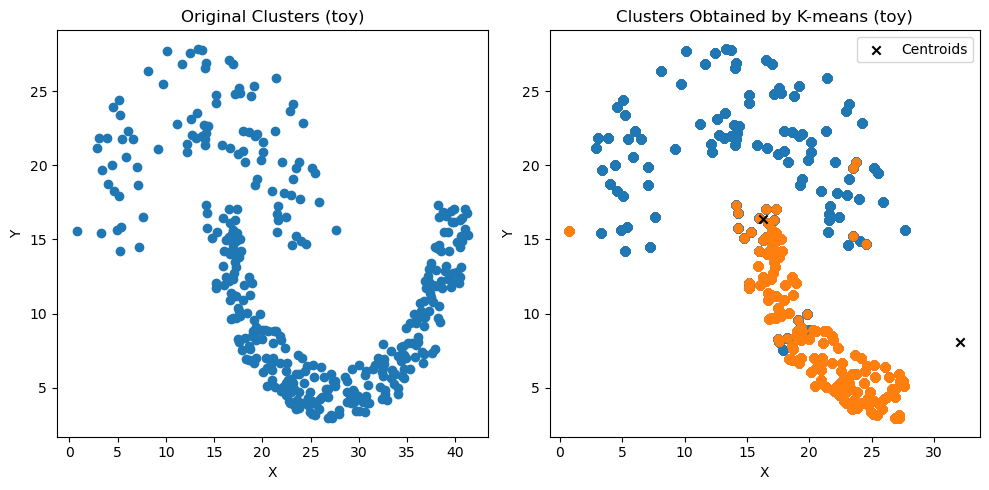

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(toy_X[:, 0], toy_X[:, 1])
plt.title('Original Clusters (toy)')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
for i, cluster in enumerate(flame_clusters):
    plt.scatter(toy_X[cluster, 0], toy_X[cluster, 1])
plt.scatter(toy_centroids[:, 0], toy_centroids[:, 1], color='black',marker="x",label='Centroids')
plt.title('Clusters Obtained by K-means (toy)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

###### Q2. Verify results obtained in Q1 using Sklearn library. Change the algorithm parameters such as distance metric, number of iterations, initialization (seed) method etc. and plot the results.

In [17]:
kmeans_flame = KMeans(n_clusters=2)
kmeans_flame.fit(flame_X)
flame_labels = kmeans_flame.labels_

kmeans_toy = KMeans(n_clusters=2)
kmeans_toy.fit(toy_X)
toy_labels = kmeans_toy.labels_


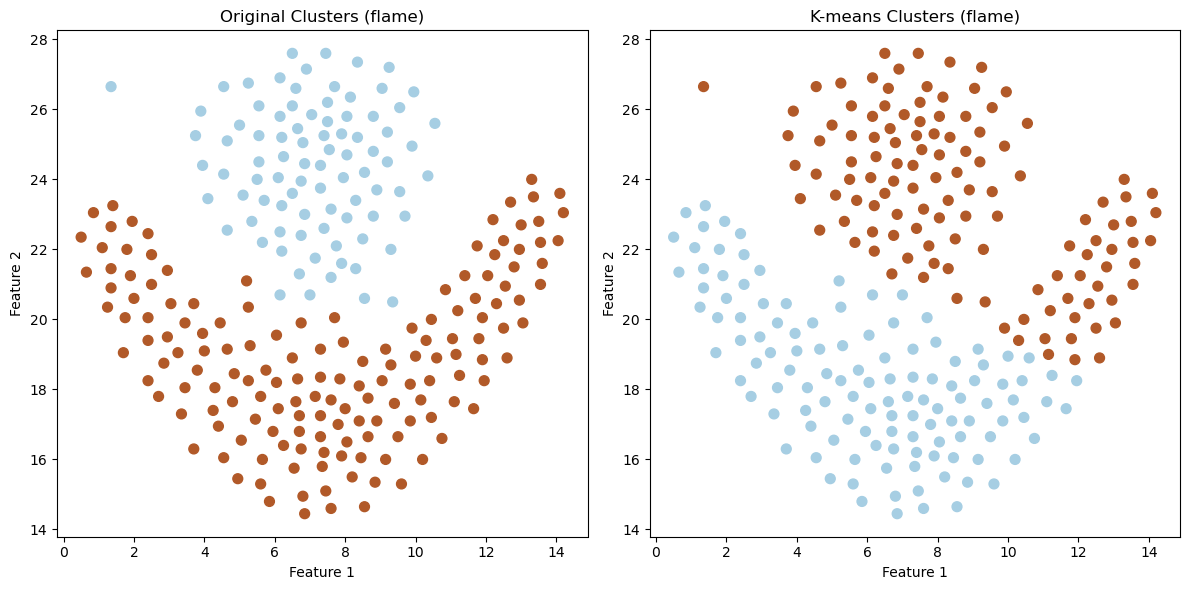

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(flame_X[:, 0], flame_X[:, 1], c=flame['1'], cmap='Paired', s=50)
plt.title('Original Clusters (flame)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(flame_X[:, 0], flame_X[:, 1], c=flame_labels, cmap='Paired', s=50)
plt.title('K-means Clusters (flame)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

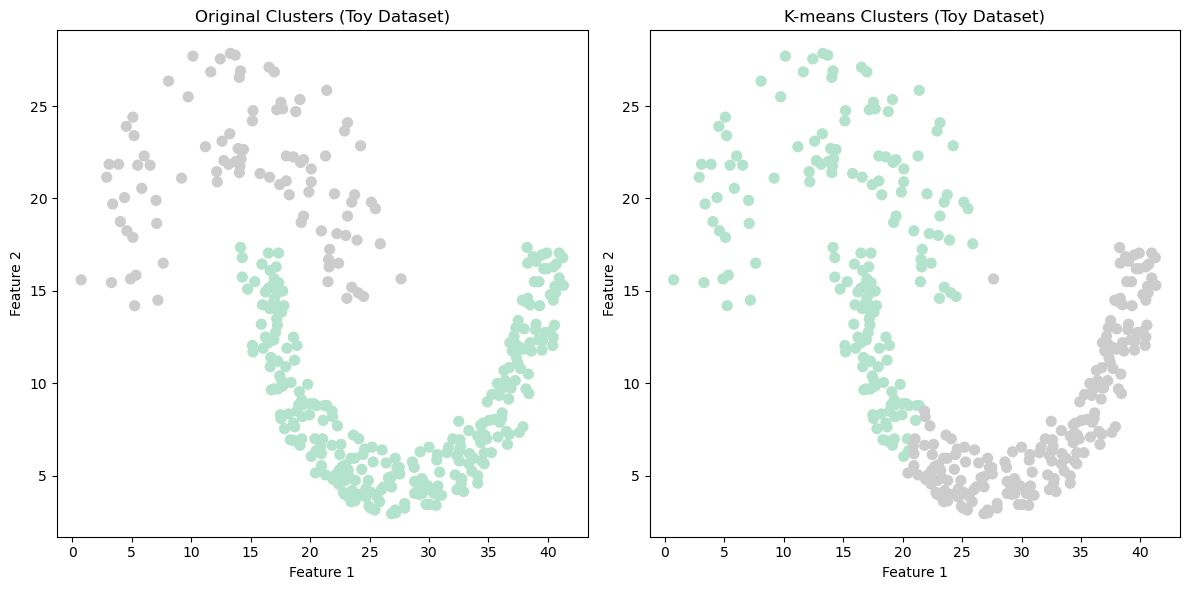

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(toy_X[:, 0],toy_X[:, 1], c=toy['2'], cmap='Pastel2', s=50)
plt.title('Original Clusters (Toy Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(toy_X[:, 0],toy_X[:, 1], c=toy_labels, cmap='Pastel2', s=50)
plt.title('K-means Clusters (Toy Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

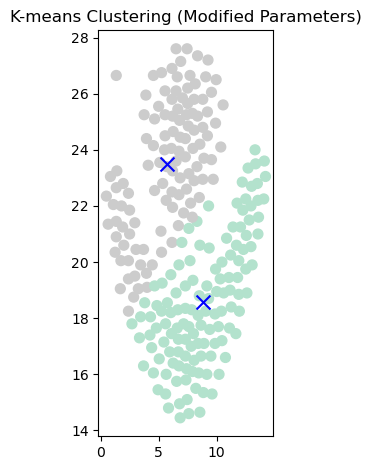

In [20]:
kmeans_modified = KMeans(n_clusters=2, init='random', max_iter=10, n_init=1, random_state=42)
kmeans_modified.fit(flame_X)
labels_modified = kmeans_modified.labels_
centers_modified = kmeans_modified.cluster_centers_

# K-means (modified parameters)
plt.subplot(1, 3, 3)
plt.scatter(flame_X[:, 0], flame_X[:, 1], c=labels_modified, cmap='Pastel2', s=50)
plt.scatter(centers_modified[:, 0], centers_modified[:, 1], c='blue', marker='x', s=100)
plt.title('K-means Clustering (Modified Parameters)')

plt.tight_layout()
plt.show()

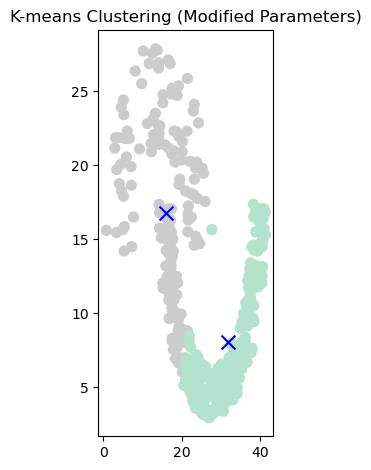

In [21]:
kmeans_modified = KMeans(n_clusters=2, init='random', max_iter=10, n_init=1, random_state=42)
kmeans_modified.fit(toy_X)
labels_modified = kmeans_modified.labels_
centers_modified = kmeans_modified.cluster_centers_

plt.subplot(1, 3, 3)
plt.scatter(toy_X[:, 0], toy_X[:, 1], c=labels_modified, cmap='Pastel2', s=50)
plt.scatter(centers_modified[:, 0], centers_modified[:, 1], c='blue', marker='x', s=100)
plt.title('K-means Clustering (Modified Parameters)')

plt.tight_layout()
plt.show()

###### Q3 Identifying valid customer groups of a retailer shops / malls is an important business problem. Find attached a dataset (shop.csv) having customer information such as gender, age, annual income and spending score. Based on these information you need to identify a set of customer groups having similar purchase patterns. The number of groups is unknown (use elbow method to find optimal number clusters). Report your clustering performance metrics (Rand index, Silhouette index). Use sklearn library for clustering as well as metrics. 

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, silhouette_score

In [24]:
df = pd.read_csv("shop.csv")
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
cluster                    int64
dtype: object


In [25]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})

In [27]:
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df.drop("cluster", axis=1))
    elbow.append(kmeans.inertia_)

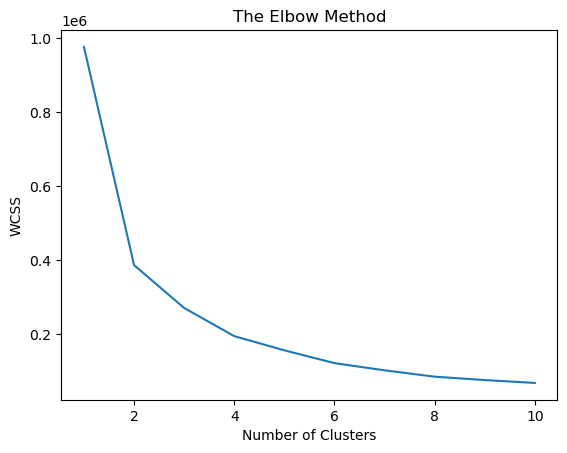

In [28]:
plt.plot(range(1, 11), elbow)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [29]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df.drop("cluster", axis=1))

KMeans(n_clusters=5, random_state=0)

In [30]:
rand_index = rand_score(df["cluster"], kmeans.labels_)
silhouette_index = silhouette_score(df.drop("cluster", axis=1), kmeans.labels_)

print("Rand index:", rand_index)
print("Silhouette index:", silhouette_index)

Rand index: 0.8865829145728643
Silhouette index: 0.42309497779166094


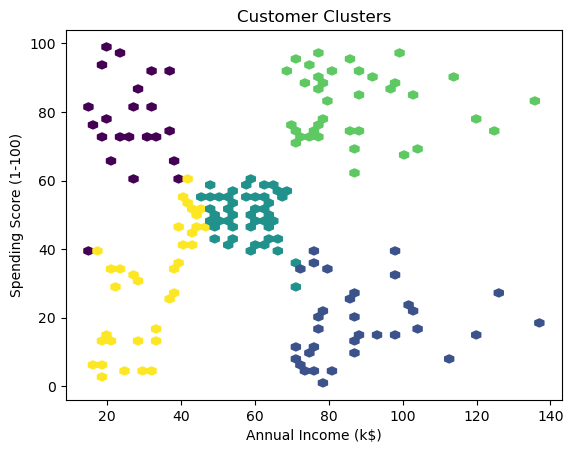

In [31]:
plt.hexbin(df["Annual Income (k$)"], df["Spending Score (1-100)"], C=kmeans.labels_,gridsize=50)
plt.title("Customer Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()